# Heart Failure Prediction
Our objective here is to build a model to predict whether or not a patient is at risk for death due to heart failure.

## Cursory Data Exploration

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's just look at the data first.

In [2]:
df = pd.read_csv('/Users/jacobder/Downloads/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Description of the Columns
- age: Age
- anaemia: Decrease of red blood cells or hemoglobin (boolean)
- creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
- diabetes: If the patient has diabetes (boolean)
- ejection fraction: Percentage of blood leaving the heart at each contraction (percentage)
- high_blood_pressure: If the patient has hypertension (boolean)
- platelets: Platelets in the blood (kiloplatelets/mL)
- serum_creatinine: Level of serum creatinine in the blood (mg/dL)
- serum_sodium: Level of serum sodium in the blood (mEq/L)
- sex: Woman or man (binary)
- smoking: If the patient smokes or not (boolean)
- time: Follow-up period (days)
- DEATH_EVENT: If the patient deceased during the follow-up period (boolean)

## Feature Selection
Note: We will ignore the time column, since it measures the time between the start of the study and a patient's death or disconnection from the study. It is therefore the most predictive variable in the dataset, but also an impractical one for trying to predict the risk level of future patients.

A good first step toward classification is to check which features seem to be correlated with the death of a patient. To this end, it's important to note that the DEATH_EVENT column is boolean whereas other features, such as ejection_fraction, are continuous. Thus, simply picking features based on Pearson coefficients would be reckless in this case. Rather, it might be useful to use logistic regression in order to see which continuous features are predictive.

In additon, as this classification can quite literally be a matter of life and death, it's likely safer to maximize recall at the cost of precision. I.e., we'd prefer to classify more patients as at-risk than actually were, rather than misclassify truly at-risk patients with a higher percentage of correct predictions--a patient misclassified as at-risk can have their prognosis reevaluated with minimal harm done. A misclassified at-risk patient may not have the same luxury. 

### Continuous Variables

In [3]:
def check_continuous_feature(column):
    """Perform logistic regression to predict DEATH_EVENT."""
    # Split data into train/test sets.
    X = np.array(df[column]).reshape(-1,1)
    y = np.array(df['DEATH_EVENT'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    #Maximize recall using a grid search.
    param_grid = {'C':[0.0001, 0.001, 0.01, 0.1, 1], 'max_iter':[200, 300, 400, 500]}
    logmodel = GridSearchCV(LogisticRegression(), param_grid, scoring='recall')

    logmodel.fit(X_train, y_train)
    y_pred = logmodel.predict(X_test)
    
    print(f'Breadown for {column}', '\n')
    print('Best paramaters:', '\n', logmodel.best_params_, '\n')
    print('Confusion matrix:', '\n', confusion_matrix(y_test, y_pred), '\n')
    print('Classification report:', '\n', classification_report(y_test, y_pred), '\n')

Now, let's check the continuous features.

In [4]:
check_continuous_feature('age')
check_continuous_feature('creatinine_phosphokinase')
check_continuous_feature('ejection_fraction')
check_continuous_feature('platelets')
check_continuous_feature('serum_creatinine')
check_continuous_feature('serum_sodium')

Breadown for age 

Best paramaters: 
 {'C': 0.1, 'max_iter': 200} 

Confusion matrix: 
 [[55  3]
 [27  5]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.67      0.95      0.79        58
           1       0.62      0.16      0.25        32

    accuracy                           0.67        90
   macro avg       0.65      0.55      0.52        90
weighted avg       0.65      0.67      0.60        90
 

Breadown for creatinine_phosphokinase 

Best paramaters: 
 {'C': 0.0001, 'max_iter': 200} 

Confusion matrix: 
 [[62  1]
 [27  0]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.70      0.98      0.82        63
           1       0.00      0.00      0.00        27

    accuracy                           0.69        90
   macro avg       0.35      0.49      0.41        90
weighted avg       0.49      0.69      0.57        90
 

Breadown for ejection_fraction 

Best paramaters: 

/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Breadown for serum_creatinine 

Best paramaters: 
 {'C': 1, 'max_iter': 200} 

Confusion matrix: 
 [[55  1]
 [29  5]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.65      0.98      0.79        56
           1       0.83      0.15      0.25        34

    accuracy                           0.67        90
   macro avg       0.74      0.56      0.52        90
weighted avg       0.72      0.67      0.58        90
 

Breadown for serum_sodium 

Best paramaters: 
 {'C': 0.1, 'max_iter': 200} 

Confusion matrix: 
 [[54  1]
 [32  3]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.63      0.98      0.77        55
           1       0.75      0.09      0.15        35

    accuracy                           0.63        90
   macro avg       0.69      0.53      0.46        90
weighted avg       0.68      0.63      0.53        90
 



So, the most predictive continuous variables seem to be **age**, **ejection_fraction**, and **serum_creatinine**.

### Boolean Variables
Next, we'd like to test how predictive the boolean features are. Again, Pearson coefficients are a bad metric to rely upon here, but so is logistic regression. Unfortunately, to the best of my knowledge, the methods available to test correlation between categorical variables will be of little use to us here. Instead we'll just do some ad hoc visualization in order to find discrepancies.

<AxesSubplot:xlabel='anaemia', ylabel='count'>

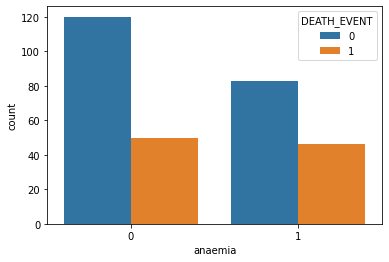

In [5]:
sns.countplot(data=df, x='anaemia', hue='DEATH_EVENT')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

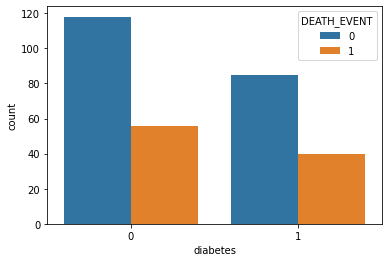

In [6]:
sns.countplot(data=df, x='diabetes', hue='DEATH_EVENT')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

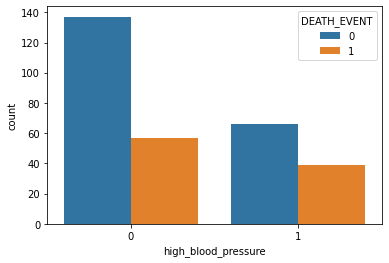

In [7]:
sns.countplot(data=df, x='high_blood_pressure', hue='DEATH_EVENT')

<AxesSubplot:xlabel='sex', ylabel='count'>

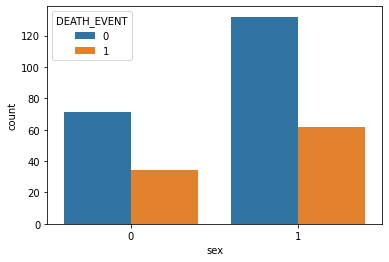

In [8]:
sns.countplot(data=df, x='sex', hue='DEATH_EVENT')

<AxesSubplot:xlabel='smoking', ylabel='count'>

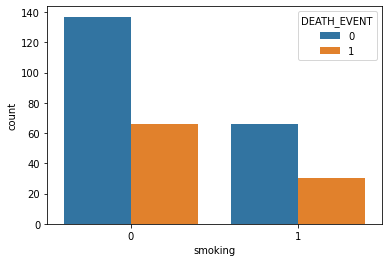

In [9]:
sns.countplot(data=df, x='smoking', hue='DEATH_EVENT')

So, of the boolean variables, **anaemia** and **high_blood_pressure** appear to have some bearing on the death rates.

## Modeling
Accordingly, we will pick our features based on the analyses above. As for the type of model to choose, a tree-based model seems to be an appropriate choice, since we are using a combination of boolean and continuous variables for prediction. We will use a gradient boosting classifier (Though, random forest could probably work as well?).

In [10]:
features = ['age', 'anaemia', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine']
X = df[features]
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

param_grid = {
    'n_estimators': np.linspace(50, 200, num=7, dtype=int),
    #'subsample': np.linspace(0.5, 1.0, num=3, dtype=float),
    'min_samples_split': np.linspace(2, 5, num=4, dtype=int),
    #'min_samples_leaf': np.linspace(1, 3, num=3, dtype=int),
    'max_depth': np.linspace(3, 25, num=12, dtype=int),
    #'min_impurity_decrease': np.linspace(0.0, 0.2, num=3, dtype=float),
    'max_features': np.linspace(1, 5, num=5, dtype=int)
}

model = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring='recall', n_jobs=-1, verbose=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Best paramaters:', '\n', model.best_params_, '\n')
print('Confusion matrix:', '\n', confusion_matrix(y_test, y_pred), '\n')
print('Classification report:', '\n', classification_report(y_test, y_pred))

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 1488 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 1938 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3138 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3888 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4738 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 5688 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 6738 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 7888 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 8400 out of 8400 | elapsed:  9.8min finished


Best paramaters: 
 {'max_depth': 17, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 200} 

Confusion matrix: 
 [[46 14]
 [ 8 22]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81        60
           1       0.61      0.73      0.67        30

    accuracy                           0.76        90
   macro avg       0.73      0.75      0.74        90
weighted avg       0.77      0.76      0.76        90



## Conclusions
By selecting relevant features and an appropriate model, and by prioritizing recall, we've constructed a model that performed decently well given the amount of training data and the nature of said data. As desired, the model was overzealous in diagnosing patients as at-risk, but as a result more truly at-risk patients were successfully identified. 

In practice a model of this calibre could be of use in a supplementary context, but certainly could not replace case-by-case examination by an expert.